In [1]:
import glob
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import cv2
from tqdm.notebook import tqdm
from utils import visualize_many_images
import tensorflow as tf
from keras import models, layers
from keras import optimizers

Using TensorFlow backend.


In [2]:
x_list = list()
y_list = list()

In [3]:
for filepath in glob.glob('./blurred_img/*.jpg'):
    x_list.append(filepath)
x_list.sort()

In [4]:
for filepath in glob.glob('./cut_img/*.jpg'):
    y_list.append(filepath)
y_list.sort()

In [11]:
x_train_list = x_list[:4000]
x_validation_list = x_list[4000:4500]
x_test_list = x_list[4500:]
y_train_list = y_list[:4000]
y_validation_list = y_list[4000:4500]
y_test_list = y_list[4500:]

In [6]:
def load_img(filepath_list):
    image = Image.open(filepath_list[0])
    data = np.asarray(image)
    data = np.expand_dims(data, axis=0)
    for i in range(1, len(filepath_list)):
        image = Image.open(filepath_list[i])
        try:
            data = np.concatenate((data,np.expand_dims(np.asarray(image), axis=0)), axis=0)
        except:
            pass
    return data

In [12]:
x_train = load_img(x_train_list)
x_validation = load_img(x_validation_list)
x_test = load_img(x_test_list)
y_train = load_img(y_train_list)
y_validation = load_img(y_validation_list)
y_test = load_img(y_test_list)

In [18]:
np.save("./dataset_npy/x_train", arr=x_train)
np.save("./dataset_npy/x_validation", arr=x_validation)
np.save("./dataset_npy/x_test", arr=x_test)
np.save("./dataset_npy/y_train", arr=y_train)
np.save("./dataset_npy/y_validation", arr=y_validation)
np.save("./dataset_npy/y_test", arr=y_test)

In [36]:
model = models.Sequential()
#encode

model.add(layers.Conv2D(128, (2, 2), strides = 1, padding = 'same', input_shape=(512,512,3)))
model.add(layers.Conv2D(64, (2, 2), strides = 1, padding = 'same'))
model.add(layers.Conv2D(32, (2, 2), strides = 1, padding = 'same'))
model.add(layers.Conv2D(16, (2, 2), strides = 1, padding = 'same'))

#latent
model.add(layers.Conv2D(8, (2, 2), strides = 1, padding = 'same'))

#decode
model.add(layers.Conv2DTranspose(16, (2, 2), strides = 1, padding = 'same'))
model.add(layers.Conv2DTranspose(32, (2, 2), strides = 1, padding = 'same'))
model.add(layers.Conv2DTranspose(64, (2, 2), strides = 1, padding = 'same'))
model.add(layers.Conv2DTranspose(128, (2, 2), strides = 1, padding = 'same'))
model.add(layers.Conv2DTranspose(3, (1, 1), strides = 1, activation = 'relu', padding = 'same'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 512, 512, 128)     1664      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 512, 512, 64)      32832     
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 512, 512, 32)      8224      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 512, 512, 16)      2064      
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 512, 512, 8)       520       
_________________________________________________________________
conv2d_transpose_16 (Conv2DT (None, 512, 512, 16)      528       
_________________________________________________________________
conv2d_transpose_17 (Conv2DT (None, 512, 512, 32)     

In [37]:
model.compile(loss = 'mse', optimizer = 'adam')

In [38]:
model.fit(x_train, y_train, epochs=8, batch_size = 8,validation_data=(x_validation, y_validation))

Train on 3445 samples, validate on 428 samples
Epoch 1/8
3445/3445 [==============================] - 181s 53ms/step - loss: 3974.1057 - val_loss: 158.1353
Epoch 2/8
3445/3445 [==============================] - 179s 52ms/step - loss: 155.3311 - val_loss: 133.3320
Epoch 3/8
3445/3445 [==============================] - 180s 52ms/step - loss: 141.3172 - val_loss: 116.0210
Epoch 4/8
   8/3445 [..............................] - ETA: 2:55 - loss: 141.8632

KeyboardInterrupt: 

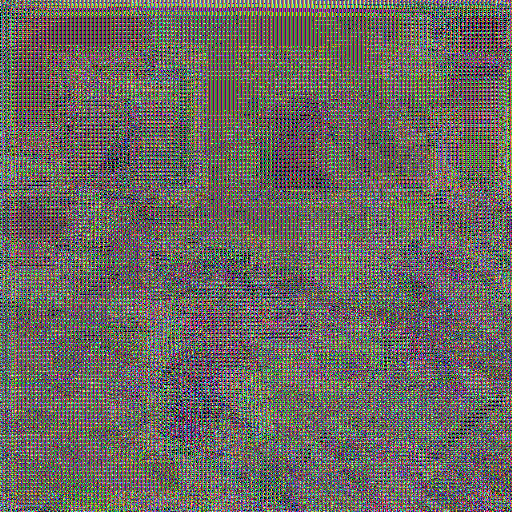

In [49]:
img = Image.fromarray(np.squeeze(model.predict(np.expand_dims(x_test[5], axis=0)), axis=0), 'RGB')
img

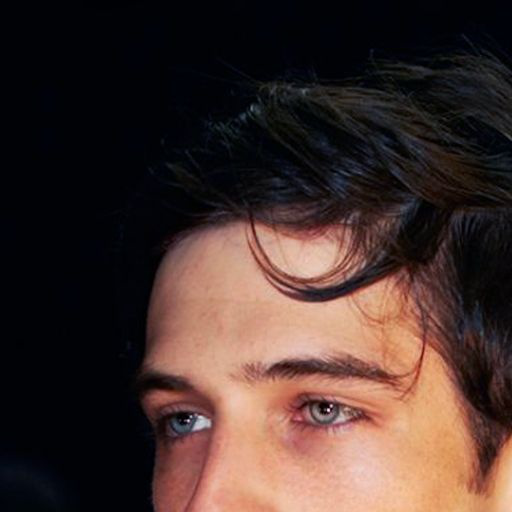

In [52]:
img = Image.fromarray(np.squeeze(np.expand_dims(y_test[5], axis=0), axis=0), 'RGB')
img